In [1]:
import matplotlib.pyplot as plt
from intelligent_placer_lib import rc, intelligent_placer
import os
import cv2

In [2]:
items = "./source items"
test_items = "./input data/items"
polygons = "./input data/polygons"

items_list = os.listdir(items)
test_items_list = os.listdir(test_items)
polygons_list = os.listdir(polygons)

Measuring the focal distance of input photos from a white sheet photo

In [3]:
import numpy as np
flag = 0
sheet = cv2.imread(os.path.join(items, items_list[items_list.index('sheet.jpg')]))
for elem in test_items_list:
    img = cv2.imread(os.path.join(test_items, elem))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = intelligent_placer.cropping_img(img)
    mask = img != 255
    rows_indices = np.where(np.any(mask, axis=1))[0]
    first_row_index, last_row_index = rows_indices[0], rows_indices[-1]
    dist = intelligent_placer.calc_focal_length(sheet, last_row_index - first_row_index)
    if dist < 25 or dist > 40:
        print(f"shooting height = {dist}", f"the shooting height limit has been exceeded for the file {elem}")
        flag = 1
if flag == 1:
    exit(0)

Defining the contour of a polygon and calculating its area

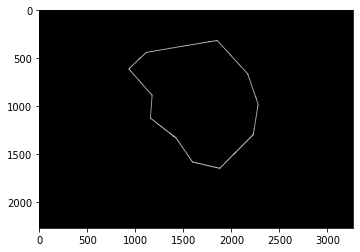

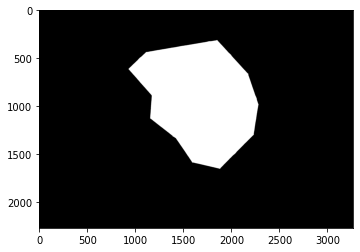

1162560


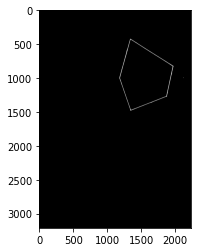

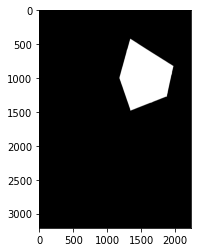

529675


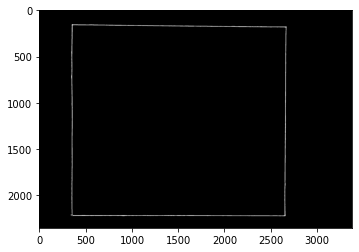

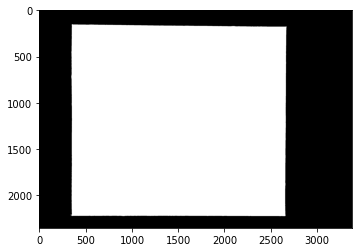

4742777


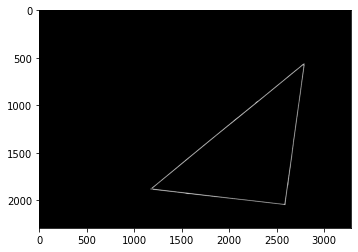

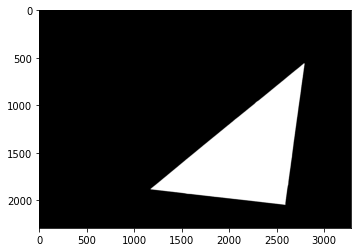

1081188


In [3]:
for elem in polygons_list:
    img = intelligent_placer.preproc_img(polygons + "/" + elem)
    if type(img) is rc.RC:
        print(img)
        exit(0)
    cropped_polygon = intelligent_placer.cropping_img(img)
    if type(cropped_polygon) is tuple:
        print(x for x in cropped_polygon)
        exit(0)
    _, area,_ = intelligent_placer.find_contour(cropped_polygon)
    if type(area) is tuple:
        print(x for x in area)
        exit(0)
    print(area)

Sours items recognition

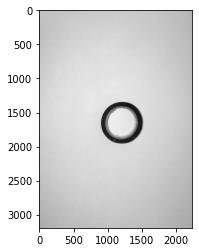

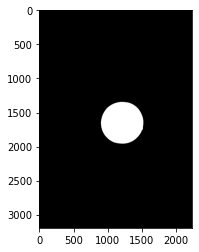

301029


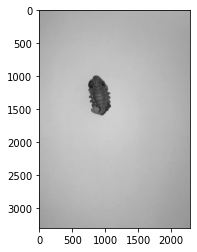

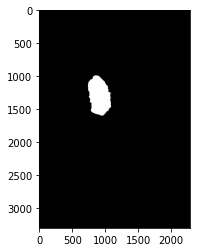

156249


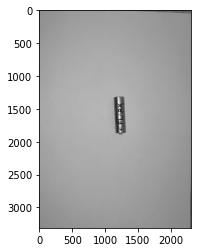

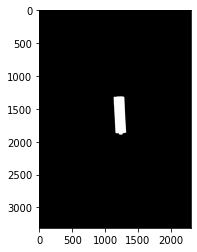

91167


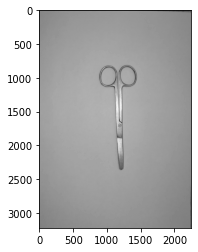

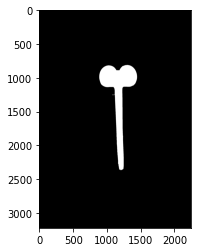

272941


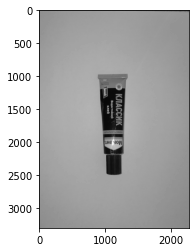

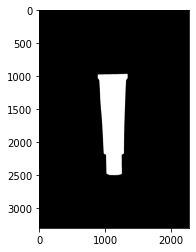

508506


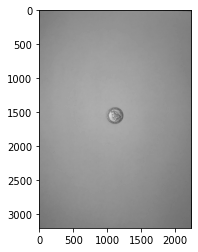

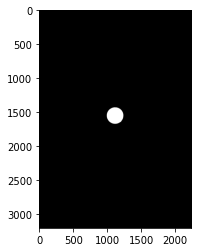

46648


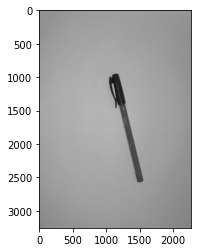

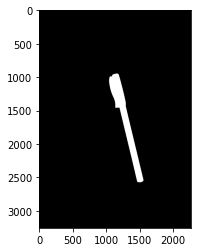

192554


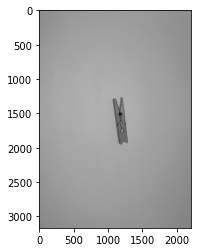

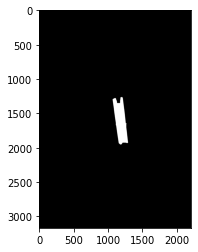

92585


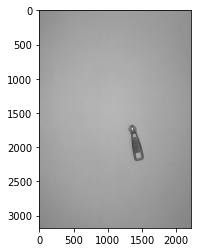

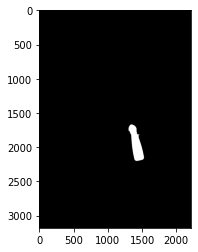

64642


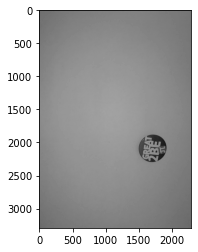

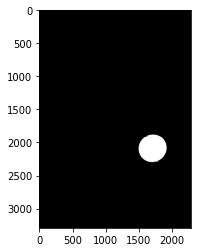

138294


In [6]:
for elem in items_list:
    if elem in (items_list[-1], items_list[-2]):
        continue
    img = intelligent_placer.preproc_img(items + "/" + elem)
    if type(img) is rc.RC:
        print(img)
        exit(0)
    cropped_item = intelligent_placer.cropping_img(img)
    plt.imshow(cropped_item, cmap='gray')
    plt.show()
    if type(cropped_item) is tuple:
        print(x for x in cropped_item)
        exit(0)
    mask, mask_area, _ = intelligent_placer.find_objects(cropped_item)
    print(mask_area)

Input items recognition

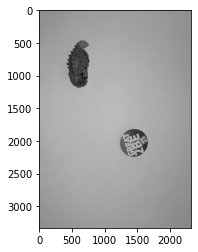

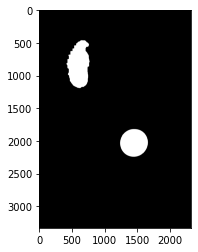

Суммарная площадь фигур = 328809


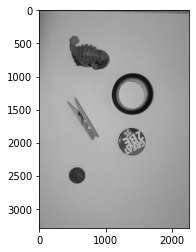

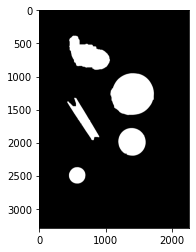

Суммарная площадь фигур = 782642


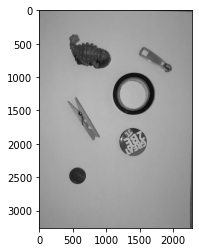

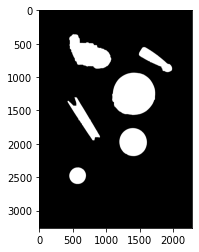

Суммарная площадь фигур = 861397


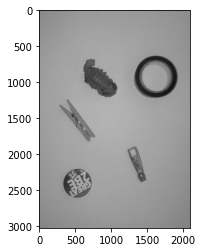

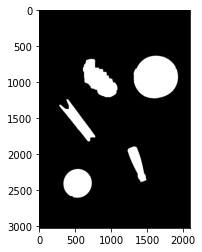

Суммарная площадь фигур = 693049


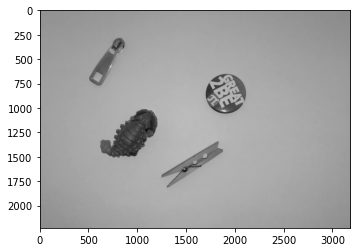

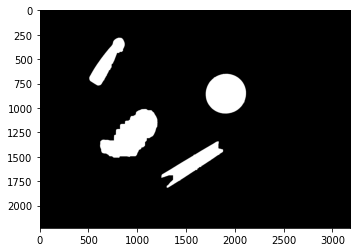

Суммарная площадь фигур = 451447


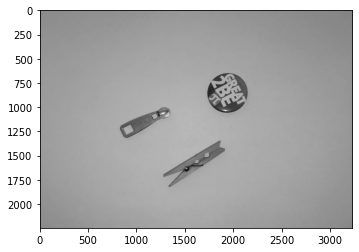

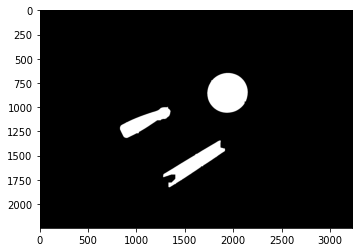

Суммарная площадь фигур = 289808


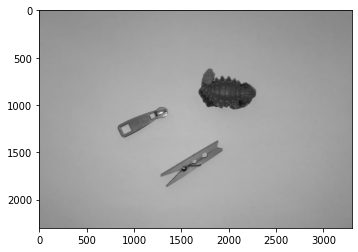

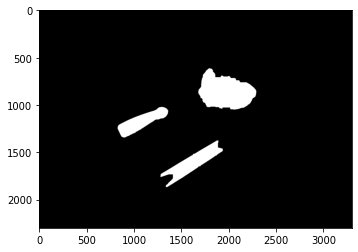

Суммарная площадь фигур = 334474


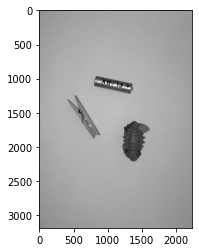

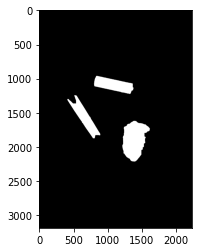

Суммарная площадь фигур = 334692


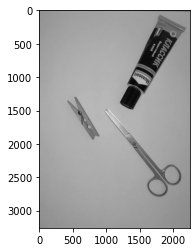

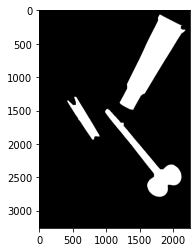

Суммарная площадь фигур = 835251


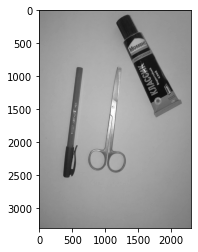

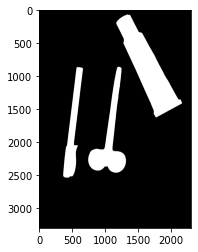

Суммарная площадь фигур = 1029361


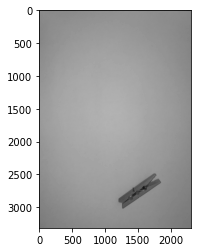

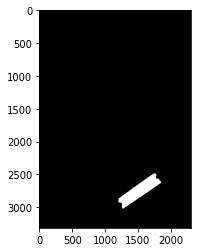

Суммарная площадь фигур = 120510


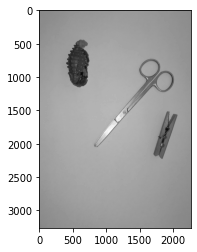

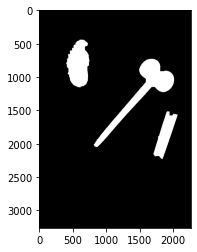

Суммарная площадь фигур = 570123


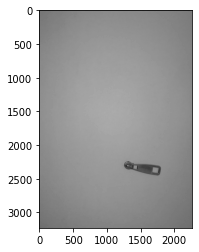

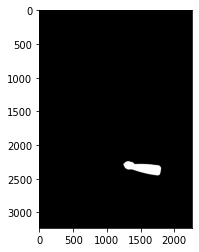

Суммарная площадь фигур = 68385


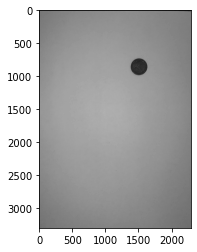

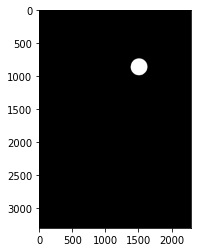

Суммарная площадь фигур = 50657


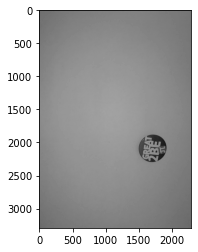

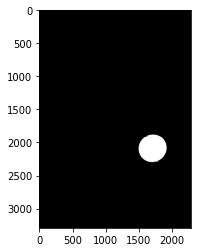

Суммарная площадь фигур = 138294


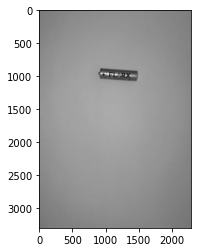

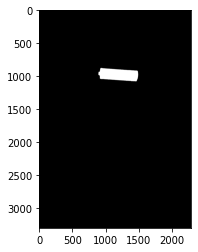

Суммарная площадь фигур = 94864


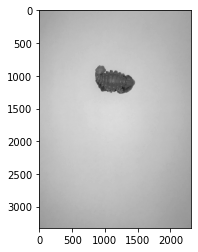

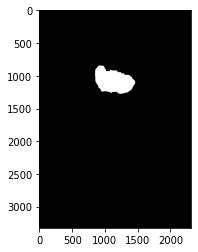

Суммарная площадь фигур = 178634


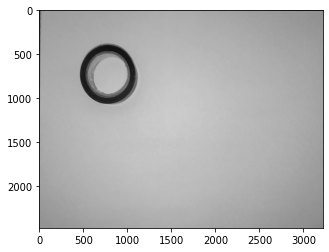

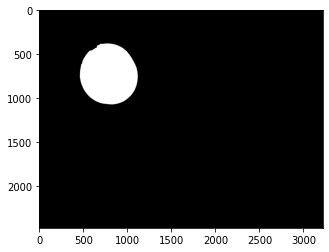

Суммарная площадь фигур = 354906


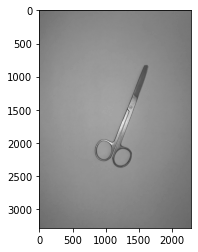

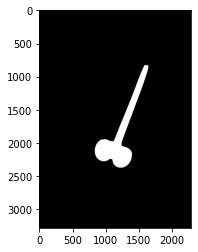

Суммарная площадь фигур = 285485


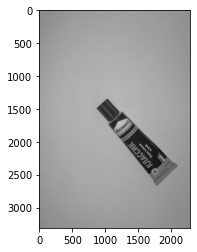

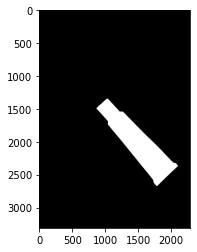

Суммарная площадь фигур = 495581


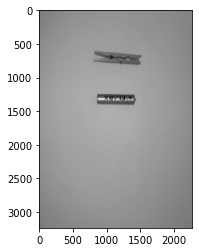

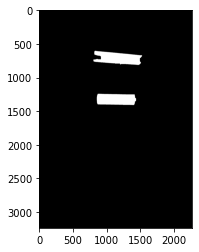

Суммарная площадь фигур = 190573


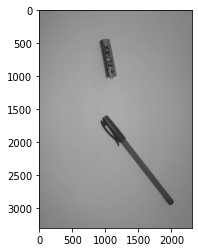

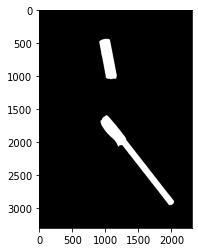

Суммарная площадь фигур = 292829


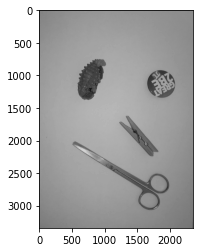

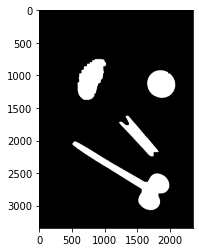

Суммарная площадь фигур = 725742


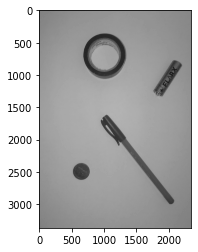

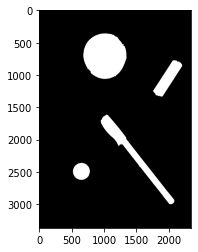

Суммарная площадь фигур = 717714


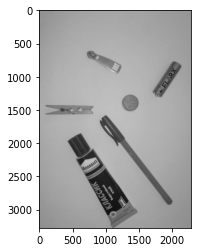

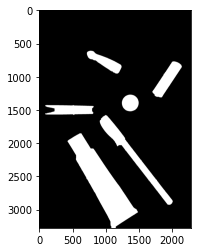

Суммарная площадь фигур = 989874


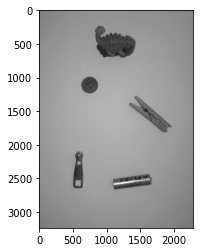

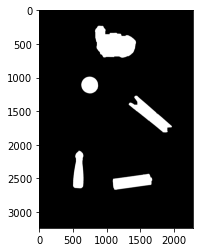

Суммарная площадь фигур = 514399


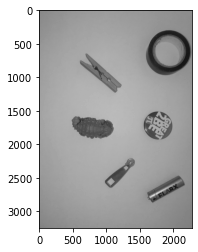

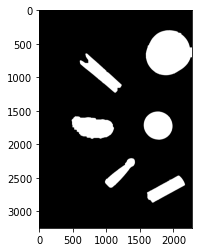

Суммарная площадь фигур = 926242


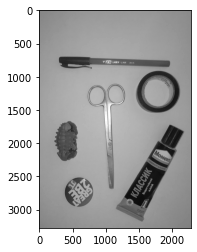

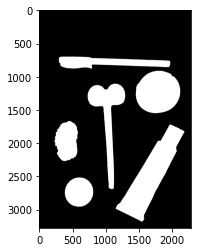

Суммарная площадь фигур = 1630350


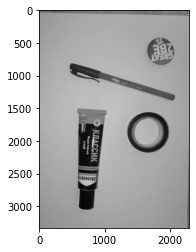

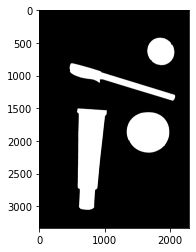

Суммарная площадь фигур = 1156360


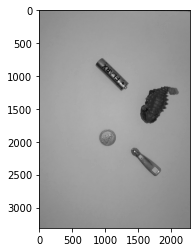

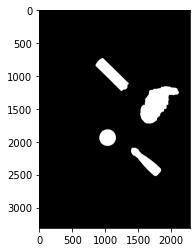

Суммарная площадь фигур = 393609


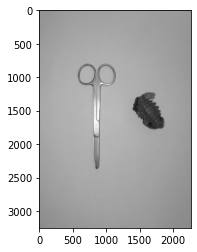

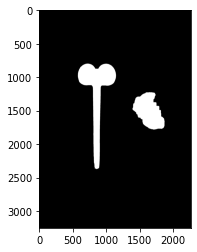

Суммарная площадь фигур = 451291


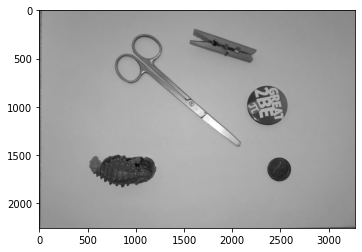

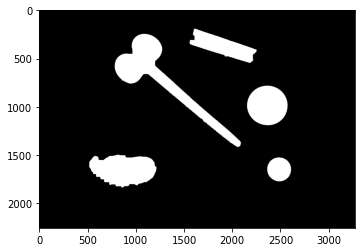

Суммарная площадь фигур = 736047


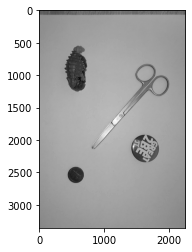

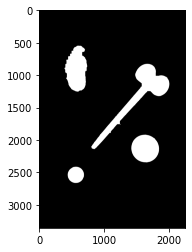

Суммарная площадь фигур = 646605


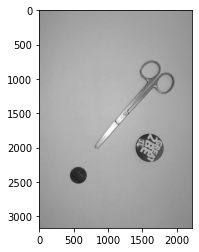

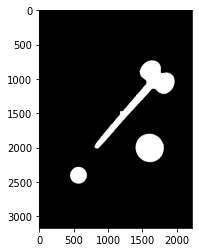

Суммарная площадь фигур = 447210


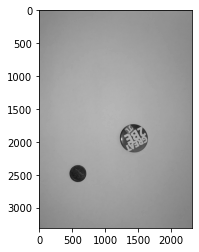

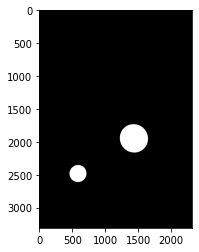

Суммарная площадь фигур = 196787


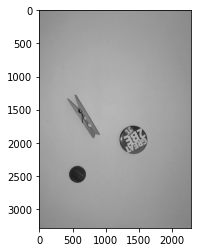

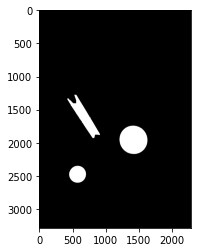

Суммарная площадь фигур = 284523


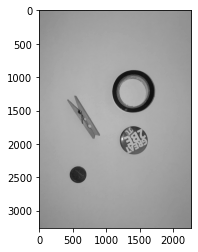

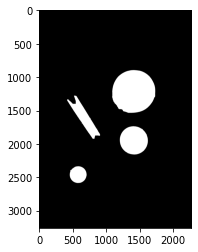

Суммарная площадь фигур = 605894


In [8]:
for elem in test_items_list:
    img = intelligent_placer.preproc_img(test_items + "/" + elem)
    if type(img) is rc.RC:
        print(img)
        exit(0)
    cropped_item = intelligent_placer.cropping_img(img)
    plt.imshow(cropped_item, cmap='gray')
    plt.show()
    if type(cropped_item) is tuple:
        print(x for x in cropped_item)
        exit(0)
    mask, mask_area, _ = intelligent_placer.find_objects(cropped_item)
    print(f'Суммарная площадь фигур = {mask_area}')

Пример размещения

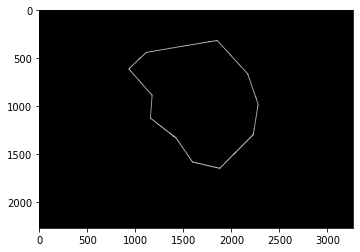

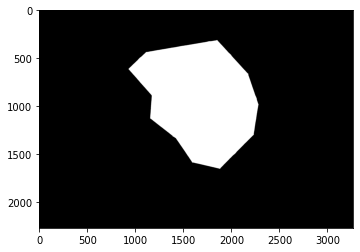

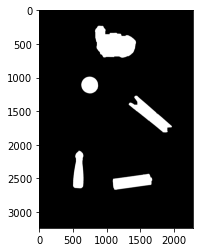

Предварительно предметы можно упаковать


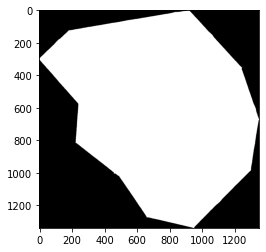

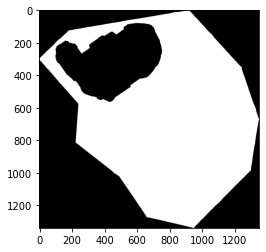

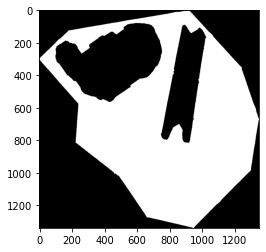

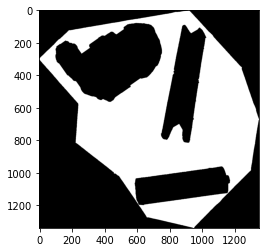

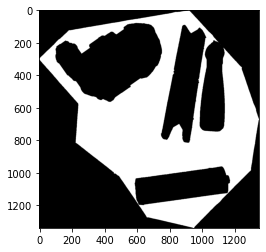

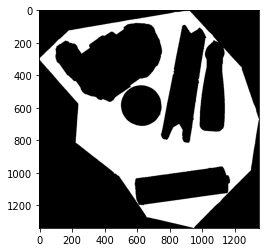

Время упаковки составило: 311.98909640312195 сек


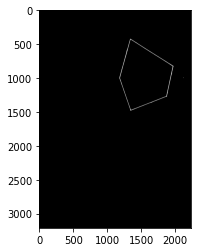

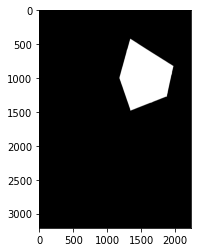

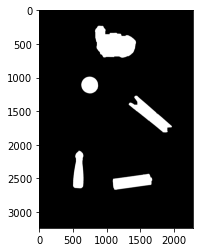

Предварительно предметы можно упаковать


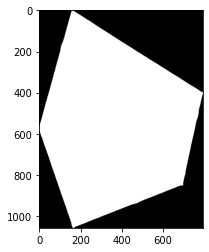

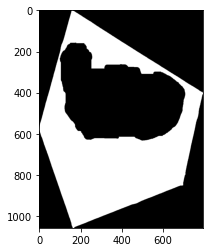

Не удалось уместить следующий предмет:


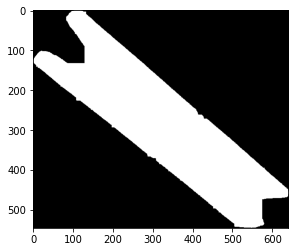

Упаковка, на которой остановились:


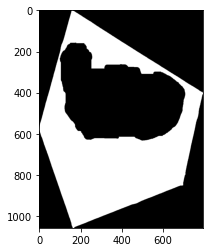

Время упаковки составило: 39.5109965801239 сек


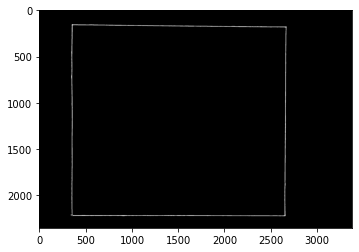

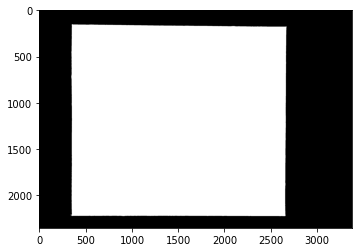

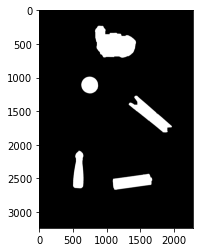

Предварительно предметы можно упаковать


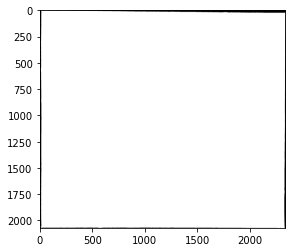

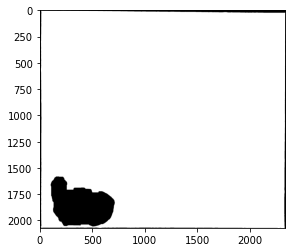

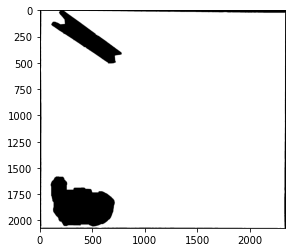

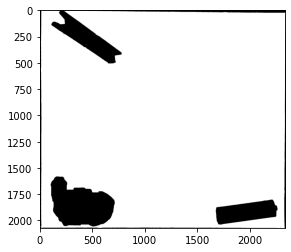

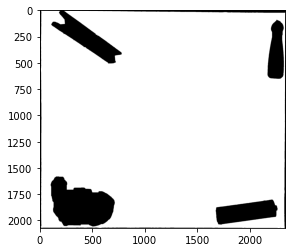

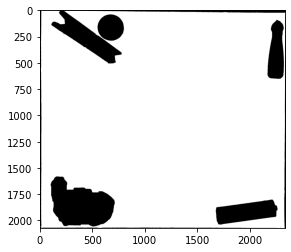

Время упаковки составило: 449.514032125473 сек


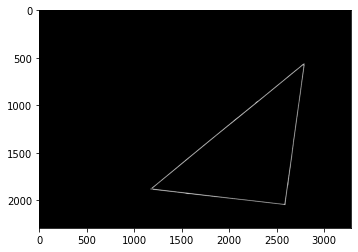

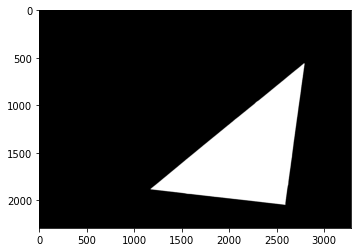

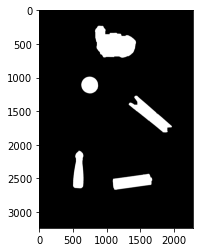

Предварительно предметы можно упаковать


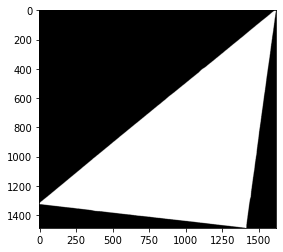

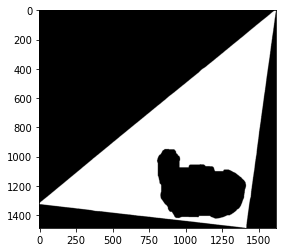

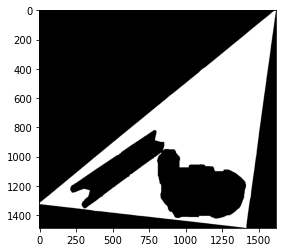

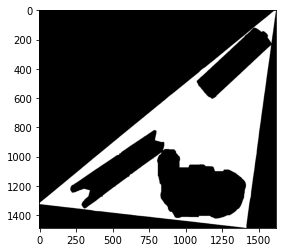

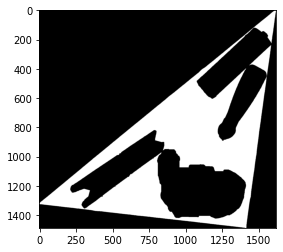

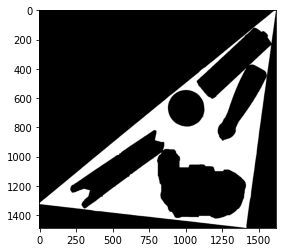

Время упаковки составило: 592.6856069564819 сек


In [3]:
from intelligent_placer_lib.intelligent_placer import check_image
for elem in polygons_list:
    path = polygons + "/" + elem
    check_image("C:/Users/reuto/PycharmProjects/ML_LAB/input data/items/32.jpg", path)

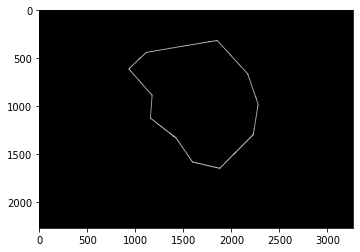

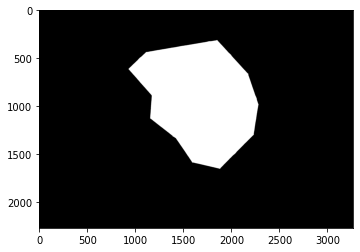

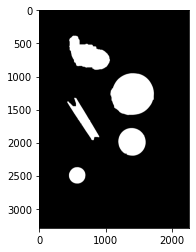

Предварительно предметы можно упаковать


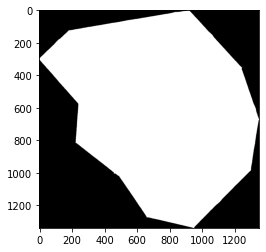

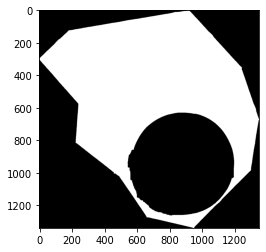

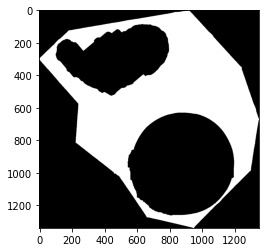

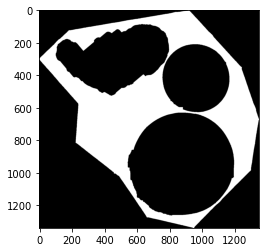

Не удалось уместить следующий предмет:


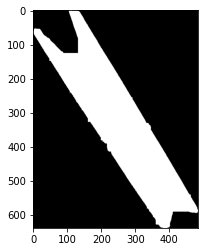

Упаковка, на которой остановились:


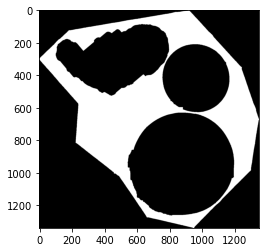

Время упаковки составило: 187.3174343109131 сек


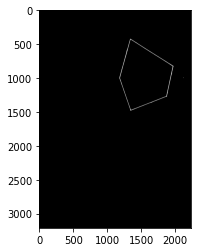

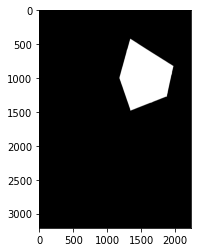

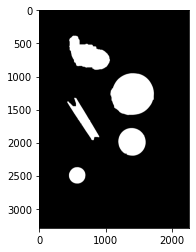

Оценочная упаковка по сумме площадей невозможна


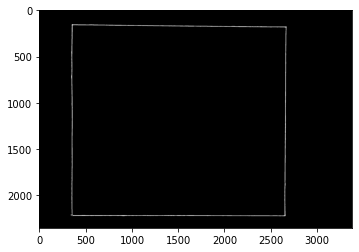

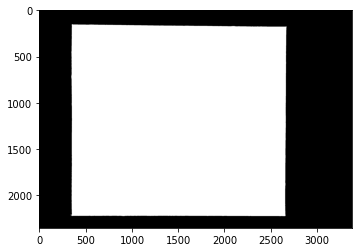

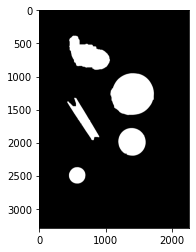

Предварительно предметы можно упаковать


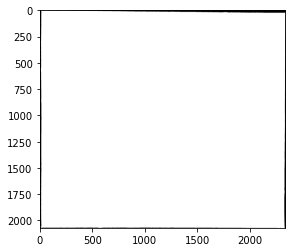

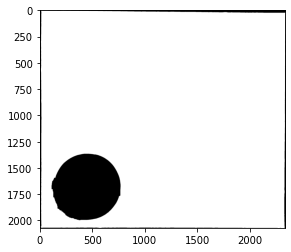

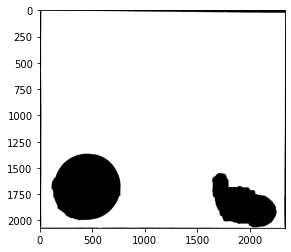

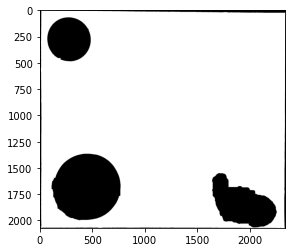

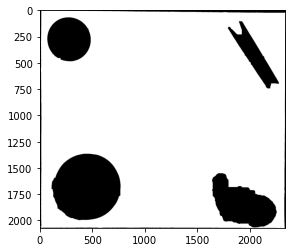

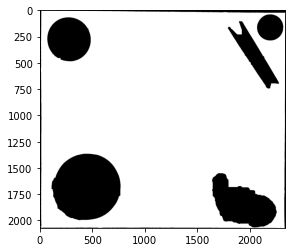

Время упаковки составило: 124.84435844421387 сек


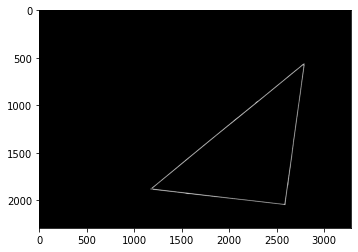

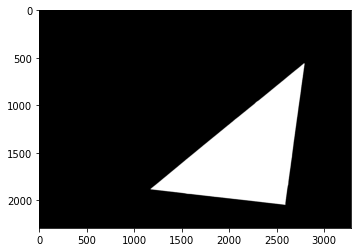

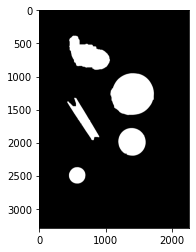

Предварительно предметы можно упаковать


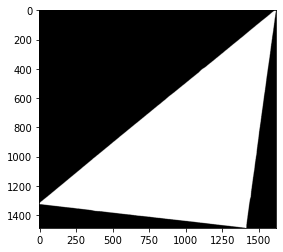

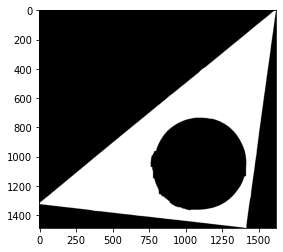

Не удалось уместить следующий предмет:


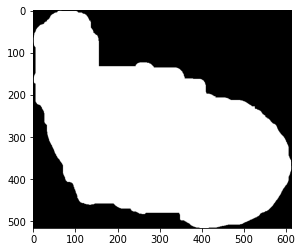

Упаковка, на которой остановились:


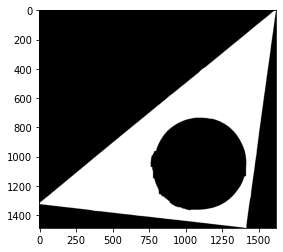

Время упаковки составило: 290.2423779964447 сек


In [4]:
from intelligent_placer_lib.intelligent_placer import check_image
for elem in polygons_list:
    path = polygons + "/" + elem
    check_image("C:/Users/reuto/PycharmProjects/ML_LAB/input data/items/10.jpg", path)

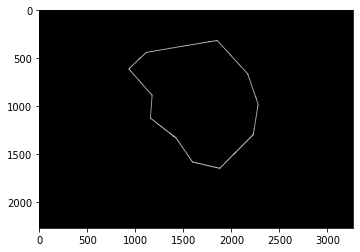

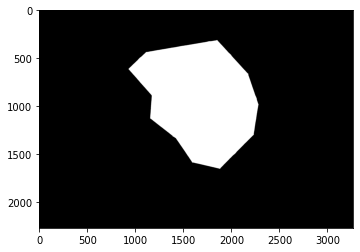

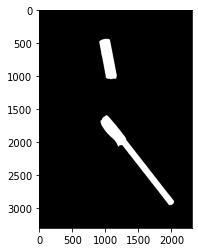

Предварительно предметы можно упаковать


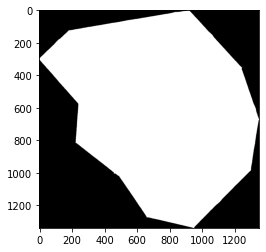

Следующий предмет не помещается по длине


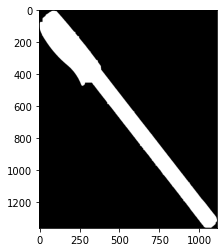

Время упаковки составило: 0.7705702781677246 сек


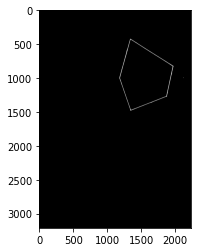

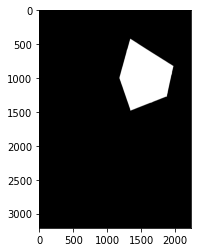

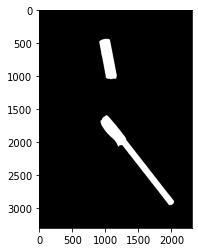

Предварительно предметы можно упаковать


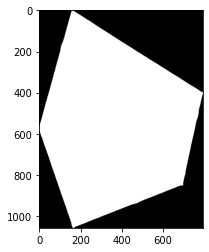

Следующий предмет не помещается по длине


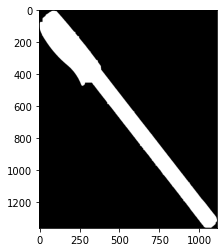

Время упаковки составило: 0.5666804313659668 сек


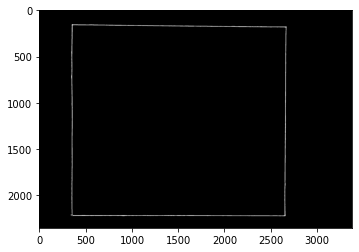

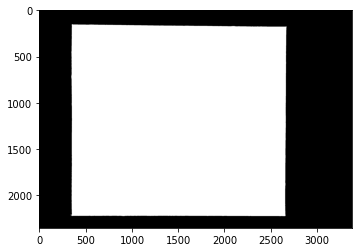

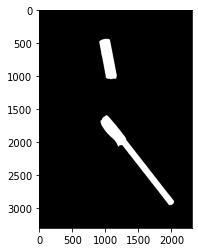

Предварительно предметы можно упаковать


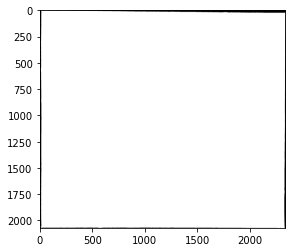

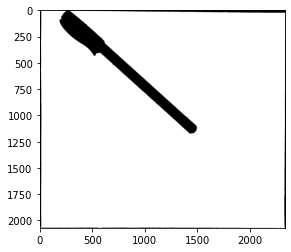

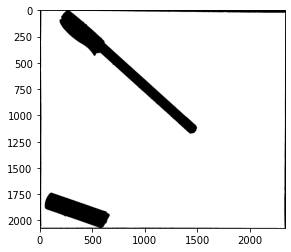

Время упаковки составило: 15.900537729263306 сек


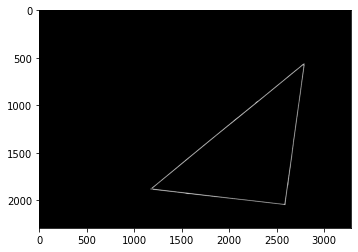

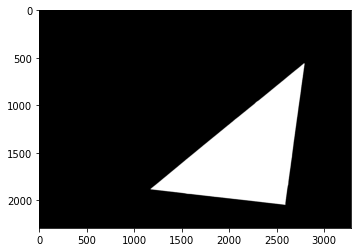

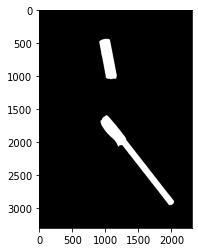

Предварительно предметы можно упаковать


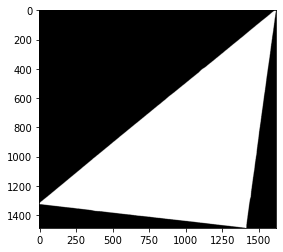

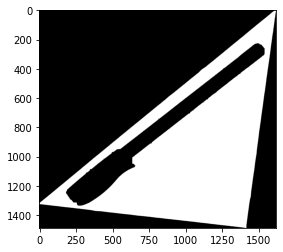

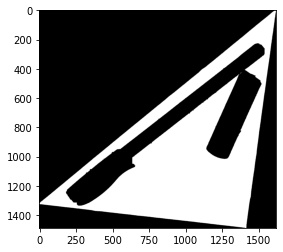

Время упаковки составило: 272.49078488349915 сек


In [5]:
from intelligent_placer_lib.intelligent_placer import check_image
for elem in polygons_list:
    path = polygons + "/" + elem
    check_image("C:/Users/reuto/PycharmProjects/ML_LAB/input data/items/29.jpg", path)